<a href="https://colab.research.google.com/github/soham-wairkar/CE888/blob/main/ASSIGNMENT2/ce888LungCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial run

In [ ]:
#https://github.com/sagihaider/TransferLearning_COVID19/blob/74d61ed94797c95a0bb722cc22675264fb3ca86f/FeatureExtractor_VGG16_COVID19_TransferLearning.ipynb
#some parts of code were taken from the above link 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!git clone https://github.com/UCSD-AI4H/COVID-CT.git

fatal: destination path 'COVID-CT' already exists and is not an empty directory.


In [10]:
## unzip archives  q - quite, n - don't overwrite
!unzip -q -n '/content/COVID-CT/Images-processed/CT_COVID.zip'
!unzip -q -n '/content/COVID-CT/Images-processed/CT_NonCOVID.zip'

In [11]:

import os
path='/content/CT_COVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="covid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)
print("Covid Positive cases: ", count)

path='/content/CT_NonCOVID/'
for count, filename in enumerate(os.listdir(path)): 
    dst ="noncovid-" + str(count) + ".png"
    src =path+ filename 
    dst =path+ dst 
        
    # rename() function will 
    # rename all the files 
    os.rename(src, dst)

print("Covid Negative cases: ", count)

Covid Positive cases:  348
Covid Negative cases:  396


# File Creation

In [12]:
base_dir = '/content/covid19_CT'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [13]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):os.mkdir(test_dir)

In [14]:
original_dataset_dir_covid = '/content/CT_COVID/'
original_dataset_dir_non_covid = '/content/CT_NonCOVID/'

import shutil
fnames = ['covid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(train_dir, fname)
    #print(src,dst)
    shutil.copyfile(src, dst)
    
fnames = ['covid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['covid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
fnames = ['noncovid-{}.png'.format(i) for i in range(250)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(train_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['noncovid-{}.png'.format(i) for i in range(250, 300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(validation_dir, fname)
    shutil.copyfile(src, dst)
original_dataset_dir_covid
fnames = ['noncovid-{}.png'.format(i) for i in range(300, 348)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_non_covid, fname)
    dst = os.path.join(test_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
import cv2
import numpy as np
from random import shuffle

IMG_SIZE = 224
LR = 1e-4

In [17]:
def label_img(img):
    word_label = img.split('-')[0]
    if word_label == 'covid': return 1
    elif word_label == 'noncovid': return 0

In [18]:
def createDataSplitSet(datapath):
    X=[]
    y=[]

    for img in os.listdir(datapath):
        label = label_img(img)
        path = os.path.join(datapath, img)
        image = cv2.resize(cv2.imread(path), (IMG_SIZE, IMG_SIZE))
        # image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        image = cv2.normalize(image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

        X.append(np.array(image))
        y.append(label)

    return np.array(X), np.array(y)

In [19]:
train_X, train_y = createDataSplitSet(train_dir)
val_X, val_y = createDataSplitSet(validation_dir)
test_X, test_y = createDataSplitSet(test_dir)
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)


(500, 224, 224, 3)
(100, 224, 224, 3)
(96, 224, 224, 3)


# Imports and Shape

In [44]:
## VGG 16

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras import Model
IMG_SIZE = 224

img_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Convolution neural network

In [66]:

from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 24, 24, 128)      

# Train Model

In [67]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [69]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint(filepath='vgg16_model.h5', save_best_only=True),
]

In [70]:

history = model.fit(train_X, train_y,
                              batch_size=10,
                              epochs=100, 
                              validation_data=(val_X, val_y),
                              callbacks=my_callbacks)


Epoch 1/100
50/50 [==============================] - 4s 66ms/step - loss: 0.7117 - accuracy: 0.4620 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 2/100
50/50 [==============================] - 3s 61ms/step - loss: 0.6926 - accuracy: 0.5500 - val_loss: 0.6346 - val_accuracy: 0.7100
Epoch 3/100
50/50 [==============================] - 3s 63ms/step - loss: 0.6387 - accuracy: 0.6120 - val_loss: 0.6336 - val_accuracy: 0.6700
Epoch 4/100
50/50 [==============================] - 3s 64ms/step - loss: 0.6086 - accuracy: 0.6860 - val_loss: 0.6106 - val_accuracy: 0.7300
Epoch 5/100
50/50 [==============================] - 3s 61ms/step - loss: 0.5788 - accuracy: 0.6920 - val_loss: 0.5885 - val_accuracy: 0.7200
Epoch 6/100
50/50 [==============================] - 3s 61ms/step - loss: 0.4962 - accuracy: 0.7500 - val_loss: 0.6482 - val_accuracy: 0.7200
Epoch 7/100
50/50 [==============================] - 3s 61ms/step - loss: 0.4495 - accuracy: 0.7860 - val_loss: 0.6240 - val_accuracy: 0.7300
Epoch 

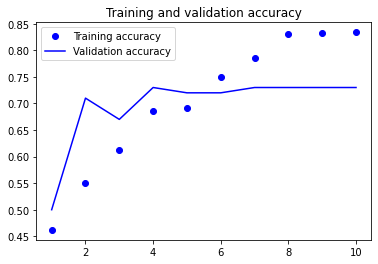

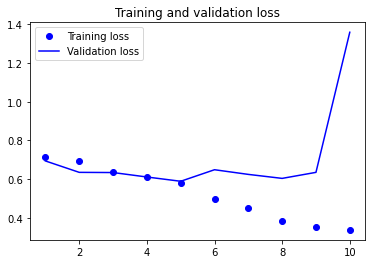

In [71]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [65]:
from sklearn.metrics import accuracy_score

## Test Accuracy
predictions = model.predict(test_X)
ypred = predictions > 0.5

test_acc = accuracy_score(test_y, ypred)

from sklearn.metrics import precision_recall_fscore_support, roc_auc_score

precision, recall, f1score, _ = precision_recall_fscore_support(test_y, ypred, average='binary')

auc = roc_auc_score(test_y, ypred)

print("Train Accuracy:\t", acc[-1])
print("Val Accuracy:\t", val_acc[-1])
print("Test Accuracy:\t", test_acc)
print("Precision:\t", precision)
print("Recall:\t\t", recall)
print("F1 Score:\t", f1score)
print("AUC:\t\t", auc)

Train Accuracy:	 0.9200000166893005
Val Accuracy:	 0.7599999904632568
Test Accuracy:	 0.7604166666666666
Precision:	 0.7777777777777778
Recall:		 0.7291666666666666
F1 Score:	 0.7526881720430108
AUC:		 0.7604166666666665
